In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import random
from itertools import combinations
from models.helpers import read_from_csv, discretize, result_to_df, calculate_rates_directed, calculate_rates_undirected
from plots.plots import plot_data, plot_result_mat, plot_roc_curve
from models.random_model import random_model, random_model_roc_values
from models.correlation_model import correlation_model, correlation_model_roc_values
from models.aracne_model import aracne_model, aracne_model_roc_values
from models.greedy_hillclimbing import greedy_hillclimbing, hillclimbing_model_roc_values
from sklearn.linear_model import LinearRegression
%load_ext autoreload
%autoreload 2

In [ ]:
# read raw data from CSV file:
gene_df = read_from_csv('gene-data.csv')

# discretize data into 5 bins of gene-specific limits:
gene_df_disc = discretize(gene_df,5)

# true network structure:
# ground_truth[i,j]=1 -> directed edge between gene i and gene j
ground_truth = result_to_df(np.array([[0,1,0,0,0],
                                      [0,0,1,0,0],
                                      [0,0,0,0,1],
                                      [0,0,0,0,0],
                                      [1,1,0,1,0]]))

In [ ]:
# Show data
gene_df.head()
print(ground_truth)

In [ ]:
# Data plots
plot_data(gene_df, discr=False)
plot_data(gene_df_disc, discr=True)

In [ ]:
corr_mat = correlation_model(gene_df, 0.75)

In [ ]:
# Plot correlation model results
plot_result_mat(corr_mat,ground_truth.copy(), directed=True)
tpr,fpr = calculate_rates_directed(df_to_try=corr_mat, df_true=ground_truth)
print('directed TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

In [ ]:
plot_result_mat(corr_mat,ground_truth.copy())
tpr,fpr = calculate_rates_undirected(df_to_try=corr_mat, df_true=ground_truth)
print('undirected TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

In [ ]:
random_mat = random_model(threshold=0.5)
# random_mat = random_model(n_edges=6)

In [ ]:
# Plot random model results
plot_result_mat(random_mat, ground_truth.copy(), directed=True)
tpr,fpr = calculate_rates_directed(df_to_try=random_mat, df_true=ground_truth)
print('directed TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

In [ ]:
plot_result_mat(random_mat,ground_truth, directed=True)
tpr,fpr = calculate_rates_directed(df_to_try=random_mat, df_true=ground_truth)
print('directed TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

In [ ]:
# Plot aracne model results
aracne_mat = aracne_model(gene_df, discr_bins=5, threshold=0.5, remove=True)
plot_result_mat(aracne_mat,ground_truth.copy())
tpr,fpr = calculate_rates_undirected(df_to_try=aracne_mat, df_true=ground_truth)
print('directed TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

In [ ]:
aracne_mat = aracne_model(gene_df, discr_bins=5, threshold=0.5, remove=False)


bj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = dividend / divisor[:, np.newaxis]
/Users/joni/Documents/code/mbn-ex/mbn-assignment/models/greedy_hillclimbing.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = dividend / divisor[:, np.newaxis]
/Users/joni/Documents/code/mbn-ex/mbn-assignment/models/greedy_hillclimbing.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = dividend / divisor[:, np.newaxis]
/Users/joni/Documents/code/mbn-ex/mbn-assignment/models/greedy_hillclimbing.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a nu

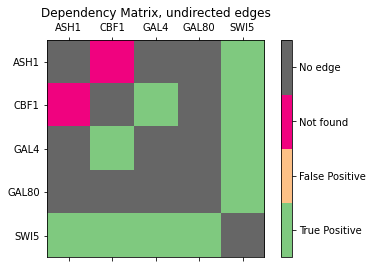

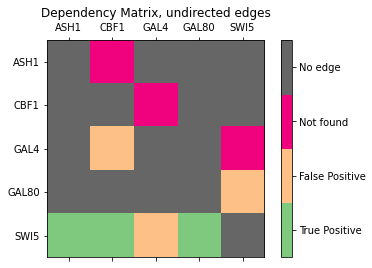

In [125]:
# Plot greedy hillclimbing model results
greedy_mat = greedy_hillclimbing(gene_df, iterations=6)
plot_result_mat(greedy_mat, ground_truth.copy())
plot_result_mat(greedy_mat,ground_truth.copy(), directed=True)

In [ ]:
roc_random = random_model_roc_values(df_truth=ground_truth, threshold_min=0, threshold_max=1, repetitions=100)
roc_correlation = correlation_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1)
roc_aracne1 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1, 
                                      bins_for_discretization=7, remove_edge_from_triplet=False)
roc_greedy = hillclimbing_model_roc_values(df_data=gene_df, df_truth=ground_truth, iterations_min= 1, iterations_max=10)

In [ ]:
# Plot directed model ROC curves
plot_roc_curve([roc_random,roc_correlation,roc_aracne1, roc_greedy], directed=True)

In [ ]:
# Plot undirected model ROC curves
plot_roc_curve([roc_random,roc_correlation,roc_aracne1, roc_greedy], directed=False)